In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

# Result:
ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                     COVID-19 Dataset                                     5MB  2022-11-13 15:47:17          15678        441  1.0              
devrimtuner/list-of-moststreamed-songs-on-spotify             Top 100 Spotify Songs👑🎤🎧🎼                            3KB  2022-12-30 05:42:54            604         39  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india  Credit Card Spending Habits in India               319KB  2022-12-14 07:30:37           1869         62  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset            Fifa World Cup 2022: Complete Dataset                7KB  2022-12-18 22:51:11           3639        127  1.0              
michals22/coffee-dataset                                      Coffee dataset                                      24KB  2022-12-15 20:02:12           3981         90  1.0              
heemalichaudhari/netflix-movies-and-series                    Netflix Movies and Series                            2MB  2022-12-22 13:34:22           1222         32  0.8235294        
sejungjenn/spotify-best-songs-of-2022                         Spotify: Winner Tracks Audio Features🎹              38KB  2022-12-28 08:06:49            312         22  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data       E-Commerce Sales Dataset                             6MB  2022-12-03 09:27:17           3255         79  1.0              
aklimarimi/qs-world-ranked-universities-20182022              QS World ranked Universities (2018-2022)            51KB  2022-12-28 03:53:39            646         32  1.0              
rajeshrampure/black-friday-sale                               Black Friday Sale                                    5MB  2022-12-24 09:37:49           1025         32  1.0              
devrimtuner/highestpaid-athletes                              HIGHEST-PAID ATHLETES⚽️🏀🏈⚾️🥎🎾                        1KB  2022-12-29 01:29:51            311         27  1.0              
heemalichaudhari/shopping                                     Shopping                                            12KB  2022-12-26 14:25:07            509         28  0.9411765        
milanvaddoriya/old-car-price-prediction                       Old car price prediction                           105KB  2022-12-24 15:38:56            476         30  1.0              
thedevastator/how-does-daily-yoga-impact-screen-time-habits   How Does Daily Yoga Impact Screen Time Habits       742B  2022-12-14 04:10:56            735         24  1.0              
thedevastator/uncovering-factors-that-affect-used-car-prices  Used Cars                                           18MB  2022-12-06 13:36:08           1193         36  1.0              
devrimtuner/list-of-mostfollowed-instagram-accounts           (TOP 50)List of most-followed Instagram accounts👑    2KB  2022-12-30 07:52:00            365         27  1.0              
thedevastator/jobs-dataset-from-glassdoor                     Salary Prediction                                    3MB  2022-11-16 13:52:31           8563        182  1.0              
dansbecker/melbourne-housing-snapshot                         Melbourne Housing Snapshot                         451KB  2018-06-05 12:52:24         103461       1191  0.7058824        
mattop/best-selling-game-boy-video-games                      Best Selling Game Boy Video Games                    2KB  2022-12-17 18:41:38            394         27  0.9705882        
rajeshrampure/zomato-dataset                                  Zomato Dataset                                      89MB  2022-12-23 07:38:07            624         28  1.0             

In [ ]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

 76% 49.0M/64.4M [00:00<00:00, 258MB/s]
100% 64.4M/64.4M [00:00<00:00, 256MB/s]


In [ ]:
!unzip "/content/cats-and-dogs-image-classification.zip" -d "/content/drive/MyDrive/Machine Learning/Kaggle Dataset"

Archive:  /content/cats-and-dogs-image-classification.zip
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/test/cats/cat_1.jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/test/cats/cat_106.jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/test/cats/cat_109.jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/test/cats/cat_113.jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/test/cats/cat_114.jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/test/cats/cat_116.jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/test/cats/cat_118.jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/test/cats/cat_119.jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/test/cats/cat_124.jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/test/cats/cat_140.jpg  
  inflating: /content/dr

In [ ]:
train_dir = "/content/drive/MyDrive/Machine Learning/Kaggle Dataset/train"
test_dir = "/content/drive/MyDrive/Machine Learning/Kaggle Dataset/test"

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.cm as cm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be replaced by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
train_generator = train_datagen.flow_from_directory(
    directory = train_dir, target_size = (100, 100), color_mode  = 'rgb', class_mode = 'binary', batch_size = 32,
    shuffle = True , seed = 2022)


Found 557 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_generator = test_datagen.flow_from_directory(
    directory = test_dir, target_size = (100, 100), color_mode = 'rgb', class_mode = 'binary',
    batch_size = 32, shuffle = True, seed = 2022)


Found 140 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 1),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 1),
    # flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 97, 97, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 95, 95, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 94, 94, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 282752)            0         
                                                                 
 dense_3 (Dense)             (None, 1024)             

In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 15,
                        verbose = 2, restore_best_weights = True)
						

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
			  

In [ ]:
tf.random.set_seed(seed = 2022)
history = model.fit(train_generator, validation_data = validation_generator, 
                    epochs = 50, verbose = 2, callbacks = [monitor])
					

Epoch 1/50
18/18 - 75s - loss: 0.9696 - accuracy: 0.5368 - val_loss: 8.6986 - val_accuracy: 0.5000 - 75s/epoch - 4s/step
Epoch 2/50
18/18 - 71s - loss: 0.6237 - accuracy: 0.6445 - val_loss: 6.7863 - val_accuracy: 0.5000 - 71s/epoch - 4s/step
Epoch 3/50
18/18 - 71s - loss: 0.5324 - accuracy: 0.7271 - val_loss: 1.1967 - val_accuracy: 0.5143 - 71s/epoch - 4s/step
Epoch 4/50
18/18 - 70s - loss: 0.3808 - accuracy: 0.8384 - val_loss: 1.9421 - val_accuracy: 0.5000 - 70s/epoch - 4s/step
Epoch 5/50
18/18 - 76s - loss: 0.2531 - accuracy: 0.9013 - val_loss: 2.9540 - val_accuracy: 0.5000 - 76s/epoch - 4s/step
Epoch 6/50
18/18 - 71s - loss: 0.1562 - accuracy: 0.9408 - val_loss: 1.1520 - val_accuracy: 0.5500 - 71s/epoch - 4s/step
Epoch 7/50
18/18 - 71s - loss: 0.1226 - accuracy: 0.9533 - val_loss: 2.9411 - val_accuracy: 0.5071 - 71s/epoch - 4s/step
Epoch 8/50
18/18 - 71s - loss: 0.1253 - accuracy: 0.9515 - val_loss: 1.0233 - val_accuracy: 0.6071 - 71s/epoch - 4s/step
Epoch 9/50
18/18 - 70s - loss: 0

KeyboardInterrupt: ignored

In [ ]:
with plt.style.context("seaborn-whitegrid"):
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 12
  fig_size[1] = 8 
  plt.plot(history.history['loss'], label = 'Training Loss')
  plt.plot(history.history['val_loss'], label = 'Testing Loss')
  plt.legend(loc = 'best')
  plt.show()

## SPorts Celebrity Images

In [ ]:
!kaggle datasets download -d yaswanthgali/sport-celebrity-image-classification

 34% 5.00M/14.8M [00:00<00:00, 51.7MB/s]
100% 14.8M/14.8M [00:00<00:00, 80.3MB/s]


In [ ]:
!unzip "/content/sport-celebrity-image-classification.zip" -d "/content/drive/MyDrive/Machine Learning/Kaggle Dataset/Sports Celebrity"

Archive:  /content/sport-celebrity-image-classification.zip
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/Sports Celebrity/Sports-celebrity images/Kane Williamson/kane_(1).jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/Sports Celebrity/Sports-celebrity images/Kane Williamson/kane_(10).jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/Sports Celebrity/Sports-celebrity images/Kane Williamson/kane_(100).jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/Sports Celebrity/Sports-celebrity images/Kane Williamson/kane_(101).jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/Sports Celebrity/Sports-celebrity images/Kane Williamson/kane_(102).jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/Sports Celebrity/Sports-celebrity images/Kane Williamson/kane_(103).jpg  
  inflating: /content/drive/MyDrive/Machine Learning/Kaggle Dataset/Sports Celebrity/Sports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.cm as cm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dir = "/content/drive/MyDrive/Machine Learning/Kaggle Dataset/Sports Celebrity/Sports-celebrity images"

In [3]:
datagen = ImageDataGenerator(rescale = 1.0/255. , validation_split = 0.1)
train_generator = datagen.flow_from_directory(
    directory = dir, target_size = (100, 100), color_mode  = 'rgb', class_mode = 'categorical', batch_size = 32,
    shuffle = True , seed = 2022, subset = 'training')

Found 399 images belonging to 4 classes.


In [4]:
validation_generator = datagen.flow_from_directory(
    directory = dir, target_size = (100, 100), color_mode = 'rgb', class_mode = 'categorical',
    batch_size = 32, shuffle = True, seed = 2022, subset = 'validation')


Found 42 images belonging to 4 classes.


when we want value use sigmoid
and when we have multi class we use softmax.

In [5]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 1),
    # flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4, activation = 'softmax'),
])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 150544)            0         
                                                                 
 dense (Dense)               (None, 1024)              154158080 
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               5

In [7]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 15,
                        verbose = 2, restore_best_weights = True)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data = validation_generator, 
                    epochs = 50, verbose = 2, callbacks = [monitor])

Epoch 1/50
13/13 - 23s - loss: 1.2775 - accuracy: 0.5338 - val_loss: 3.7084 - val_accuracy: 0.3810 - 23s/epoch - 2s/step
Epoch 2/50
13/13 - 22s - loss: 0.6852 - accuracy: 0.7669 - val_loss: 2.1727 - val_accuracy: 0.4286 - 22s/epoch - 2s/step
Epoch 3/50
13/13 - 22s - loss: 0.4460 - accuracy: 0.8446 - val_loss: 1.7929 - val_accuracy: 0.4048 - 22s/epoch - 2s/step
Epoch 4/50
13/13 - 22s - loss: 0.2232 - accuracy: 0.9398 - val_loss: 1.8972 - val_accuracy: 0.4762 - 22s/epoch - 2s/step
Epoch 5/50
13/13 - 22s - loss: 0.0741 - accuracy: 0.9850 - val_loss: 1.6288 - val_accuracy: 0.4286 - 22s/epoch - 2s/step
Epoch 6/50
13/13 - 22s - loss: 0.0376 - accuracy: 0.9950 - val_loss: 1.4364 - val_accuracy: 0.4762 - 22s/epoch - 2s/step
Epoch 7/50
Epoch 8/50
13/13 - 22s - loss: 0.0339 - accuracy: 0.9925 - val_loss: 1.2382 - val_accuracy: 0.5238 - 22s/epoch - 2s/step
Epoch 9/50
13/13 - 22s - loss: 0.0246 - accuracy: 0.9925 - val_loss: 1.2701 - val_accuracy: 0.3571 - 22s/epoch - 2s/step
Epoch 10/50
13/13 - 2

Changing some parmeters in the upper file and again executing it.

In [8]:
dir = "/content/drive/MyDrive/Machine Learning/Kaggle Dataset/Sports Celebrity/Sports-celebrity images"

In [9]:
datagen = ImageDataGenerator(rescale = 1.0/255. , validation_split = 0.1,
                             rotation_range = 20,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 60,
                             horizontal_flip = True)
train_generator = datagen.flow_from_directory(
    directory = dir, target_size = (100, 100), color_mode  = 'rgb', class_mode = 'categorical', batch_size = 32,
    shuffle = True , seed = 2022, subset = 'training')

Found 399 images belonging to 4 classes.


In [10]:
validation_generator = datagen.flow_from_directory(
    directory = dir, target_size = (100, 100), color_mode = 'rgb', class_mode = 'categorical',
    batch_size = 32, shuffle = True, seed = 2022, subset = 'validation')

Found 42 images belonging to 4 classes.


In [17]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2,1),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,1),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [18]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 15,
                        verbose = 2, restore_best_weights = True)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data = validation_generator, 
                    epochs = 50, verbose = 2, callbacks = [monitor])

Epoch 1/50
13/13 - 27s - loss: 1.8807 - accuracy: 0.4110 - val_loss: 7.1637 - val_accuracy: 0.3095 - 27s/epoch - 2s/step
Epoch 2/50
13/13 - 24s - loss: 1.2412 - accuracy: 0.4662 - val_loss: 4.2402 - val_accuracy: 0.2381 - 24s/epoch - 2s/step
Epoch 3/50
13/13 - 24s - loss: 1.2104 - accuracy: 0.4762 - val_loss: 5.7876 - val_accuracy: 0.2143 - 24s/epoch - 2s/step
Epoch 4/50
13/13 - 24s - loss: 1.1041 - accuracy: 0.5238 - val_loss: 3.1020 - val_accuracy: 0.2619 - 24s/epoch - 2s/step
Epoch 5/50
13/13 - 23s - loss: 1.1140 - accuracy: 0.5514 - val_loss: 3.3039 - val_accuracy: 0.2857 - 23s/epoch - 2s/step
Epoch 6/50
13/13 - 24s - loss: 1.0324 - accuracy: 0.5689 - val_loss: 1.4367 - val_accuracy: 0.4524 - 24s/epoch - 2s/step
Epoch 7/50
13/13 - 23s - loss: 0.9962 - accuracy: 0.5965 - val_loss: 1.7444 - val_accuracy: 0.5000 - 23s/epoch - 2s/step
Epoch 8/50
13/13 - 23s - loss: 0.9582 - accuracy: 0.6291 - val_loss: 1.7961 - val_accuracy: 0.3571 - 23s/epoch - 2s/step
Epoch 9/50
13/13 - 23s - loss: 0

## Transfer learning

In [19]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import plot_model

In [22]:
pre_trained = InceptionV3(include_top=False, weights='imagenet', classes=4,
                          pooling='max',
                          classifier_activation='softmax')

###Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/inception_v3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
87910968/87910968 [==============================] - 1s 0us/step

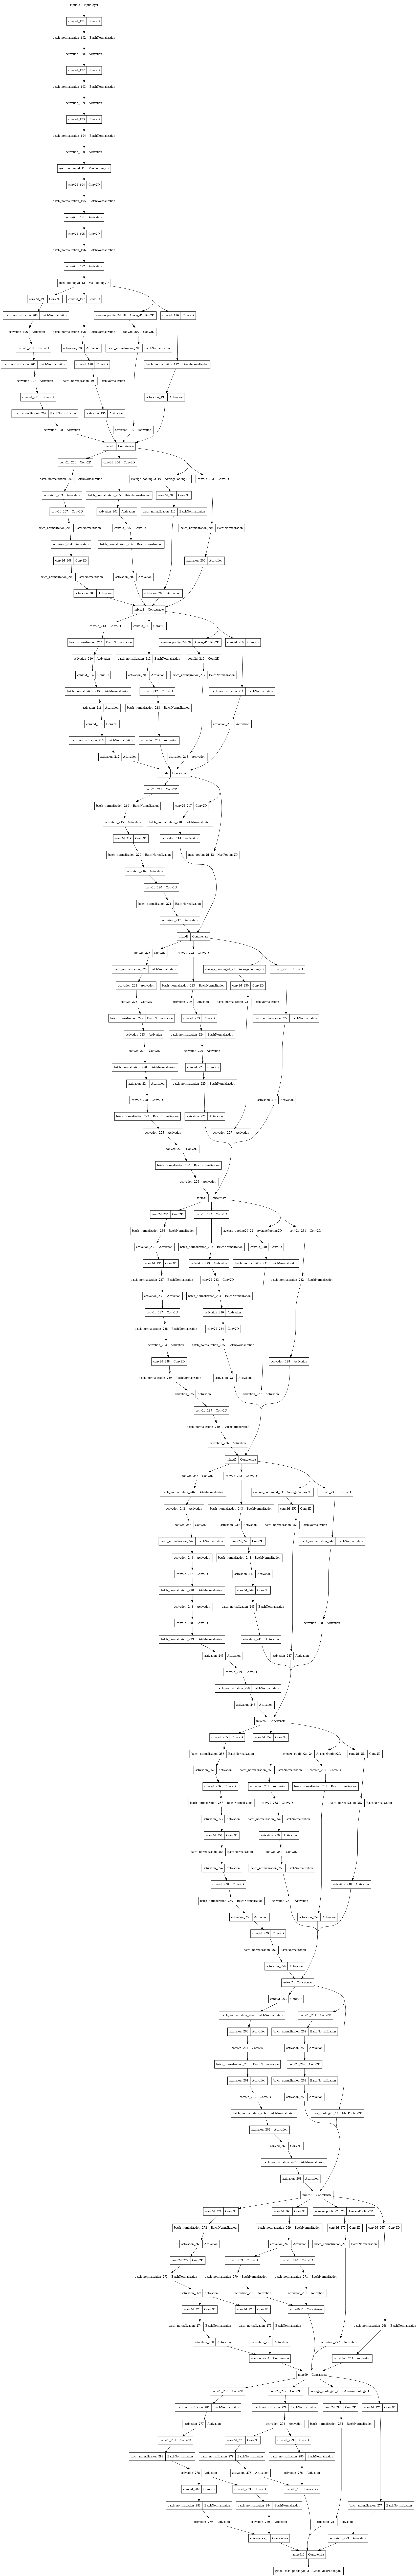

In [23]:
plot_model(pre_trained)

In [24]:
pre_trained.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_191 (Conv2D)            (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_192 (Batch  (None, None, None,   96         ['conv2d_191[0][0]']             
 Normalization)                 32)                                                    

## Freeze the Original weights

In [25]:
pre_trained.trainable = False

## Customize the model

In [28]:
model = tf.keras.Sequential([
    pre_trained,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(200, activation='relu'), 
    tf.keras.layers.Dense(4, activation='sigmoid')])
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,verbose=2,restore_best_weights=True)
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=50,
                    verbose=2, callbacks=[monitor])

Epoch 1/50
13/13 - 77s - loss: 1.8033 - accuracy: 0.2907 - val_loss: 1.4769 - val_accuracy: 0.2619 - 77s/epoch - 6s/step
Epoch 2/50
13/13 - 10s - loss: 1.4243 - accuracy: 0.3133 - val_loss: 1.3487 - val_accuracy: 0.3333 - 10s/epoch - 792ms/step
Epoch 3/50
13/13 - 10s - loss: 1.2957 - accuracy: 0.4160 - val_loss: 1.3301 - val_accuracy: 0.3333 - 10s/epoch - 787ms/step
Epoch 4/50
13/13 - 10s - loss: 1.2715 - accuracy: 0.4461 - val_loss: 1.3918 - val_accuracy: 0.3333 - 10s/epoch - 780ms/step
Epoch 5/50
13/13 - 10s - loss: 1.2727 - accuracy: 0.4411 - val_loss: 1.3125 - val_accuracy: 0.4048 - 10s/epoch - 785ms/step
Epoch 6/50
13/13 - 10s - loss: 1.2607 - accuracy: 0.4010 - val_loss: 1.2816 - val_accuracy: 0.4524 - 10s/epoch - 794ms/step
Epoch 7/50
